# Import Libraires

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#pinrt the plot inline in matplotlib
%matplotlib inline

# set the max-size of the colums to display in output
pd.set_option('max_column', 30)

plt.rcParams['figure.figsize'] = [20,10]

## Loading data

In [2]:
# import csv

df = pd.read_csv('https://raw.githubusercontent.com/benai9916/interns_task/main/taskdata.csv')

In [3]:
# show first five rows
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [4]:
# shape of  df 

df.shape

(4407, 17)

In [5]:
# print descriptive statistic on numerical columns

df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [6]:
# print some few imformation about database 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
user_id                  4407 non-null int64
account_id               4400 non-null float64
max_return_days          4407 non-null int64
average_return_days      4407 non-null float64
customer_since_months    4407 non-null int64
total_revenue            4407 non-null float64
average_revenue          4407 non-null float64
avg_vas_count            4407 non-null float64
avg_used_vas_value       4407 non-null float64
business_type            4407 non-null int64
avg_wallet_bonus         4407 non-null float64
avg_active_ads           4407 non-null float64
avg_new_ads              4407 non-null float64
avg_email_replies        4407 non-null float64
avg_call_replies         4407 non-null float64
avg_sms_replies          4407 non-null float64
target                   4407 non-null int64
dtypes: float64(12), int64(5)
memory usage: 585.4 KB


In [7]:
# count the data type in each column
dtype_df = pd.DataFrame(df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})

dtype_df

,variableType,count
0,float64,12
1,int64,5


## Missing Values


In [8]:
# list out all the NaN values of categorical variable

categorical_column = [cols for cols in df.columns if df[cols].isnull().sum()]
categorical_column

['account_id']

In [9]:

df['account_id'].value_counts()

1005.0    684
493.0     483
499.0     467
496.0     467
262.0     438
1017.0    436
113.0     290
226.0     275
111.0     248
112.0     148
364.0     134
517.0     112
202.0     111
115.0      73
116.0      34
Name: account_id, dtype: int64

## Handle missing value

In [10]:
# replace the missing value with the most occurance value in the account_id

df['account_id'] = df['account_id'].fillna(df['account_id'].max())

df['account_id'].isna().sum()

0

In [11]:
df.head(2)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.5,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.25,32.416667,27.916667,0.25,0
1,410240,499.0,37,8.2,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.30,16.200000,13.800000,0.00,0


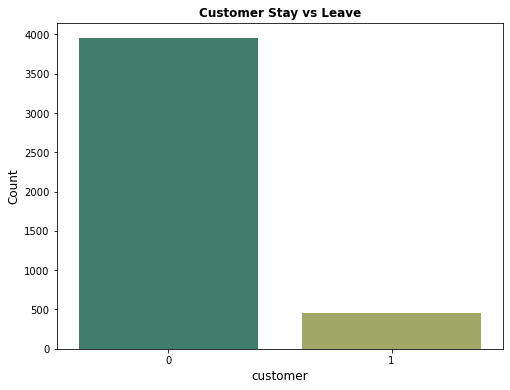

In [12]:
# customer stay vs leave

plt.figure(figsize=(8,6))
sns.countplot(x='target', data = df, palette='gist_earth')
plt.title('Customer Stay vs Leave', weight='bold')
plt.xlabel('customer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# a clear case of highly imbalanced class

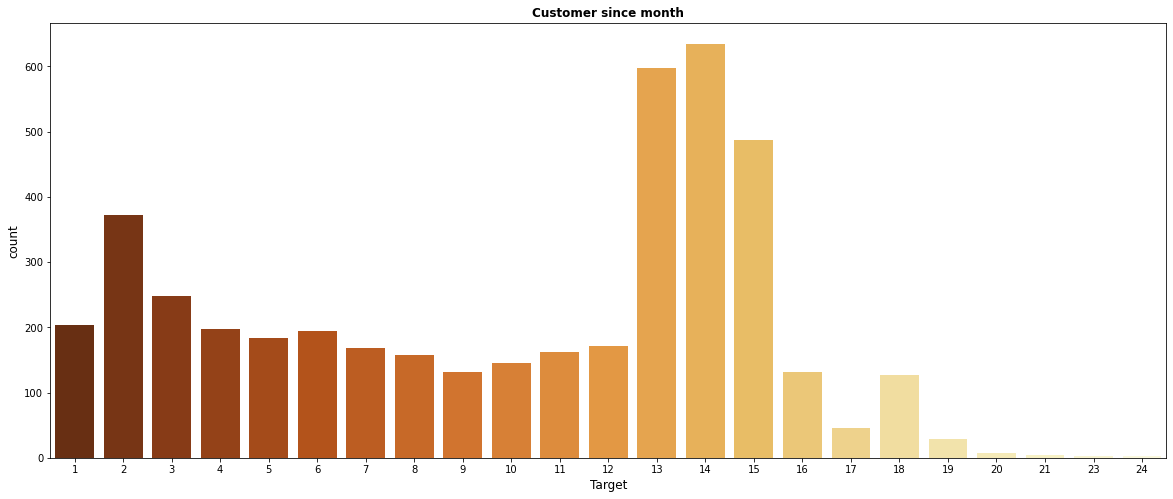

In [13]:
# customer since months.  

plt.figure(figsize=(20,8))
sns.countplot(x='customer_since_months', data = df, palette='YlOrBr_r')
plt.title('Customer since month', weight='bold')
plt.xlabel('Target', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

# most of the customer stayed till month 13,14,15

In [14]:
# Generic method for count plot

def plot(cols):
    plt.figure(figsize=(18,8))
    plt.title('Customer stay or leave', fontsize=24)
    sns.countplot(x=cols, data=df, hue='target')
    plt.legend(loc='upper right')
    plt.show()

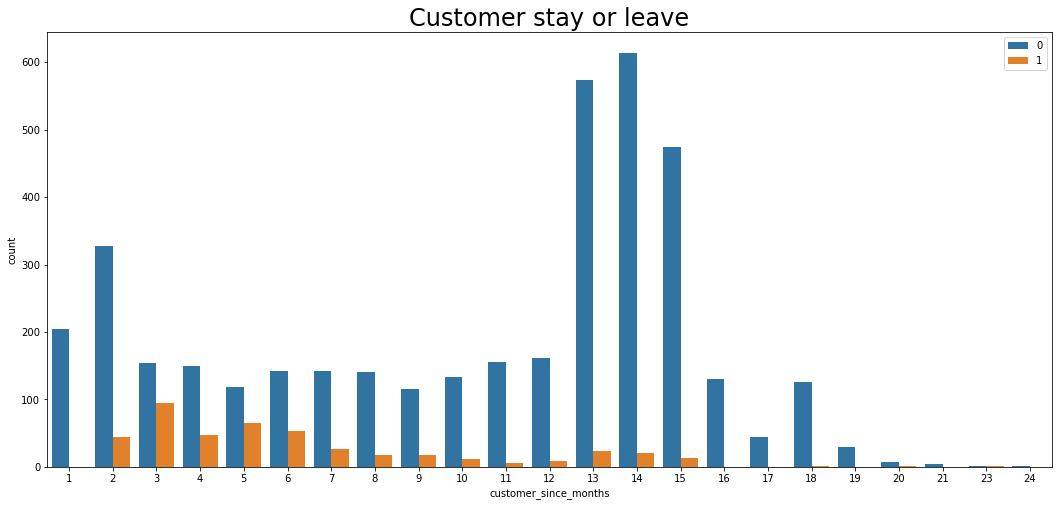

In [15]:
plot('customer_since_months')

# we can see more no of customer left in month 13,14,15

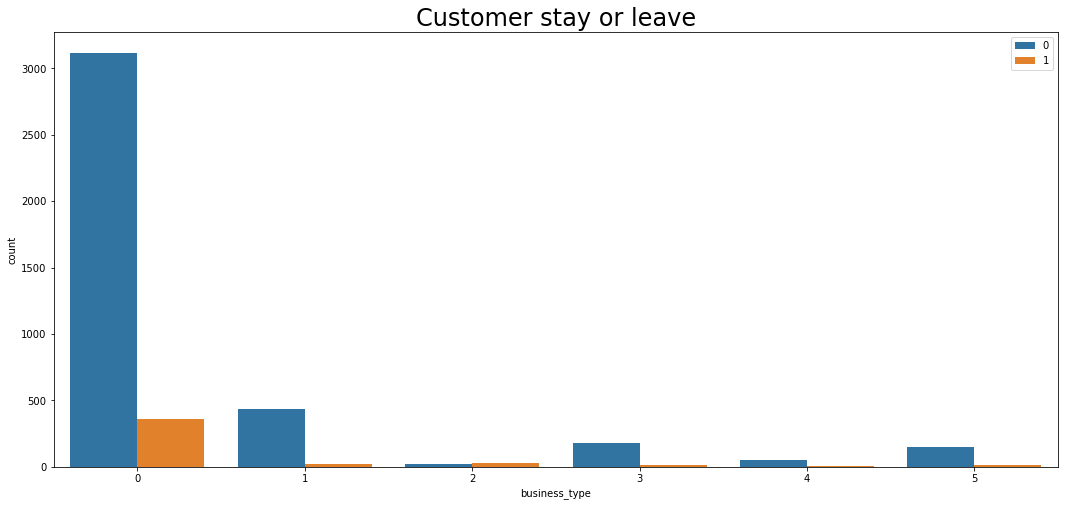

In [16]:
plot('business_type')

# customer that left mostly fall in the category of business type 0

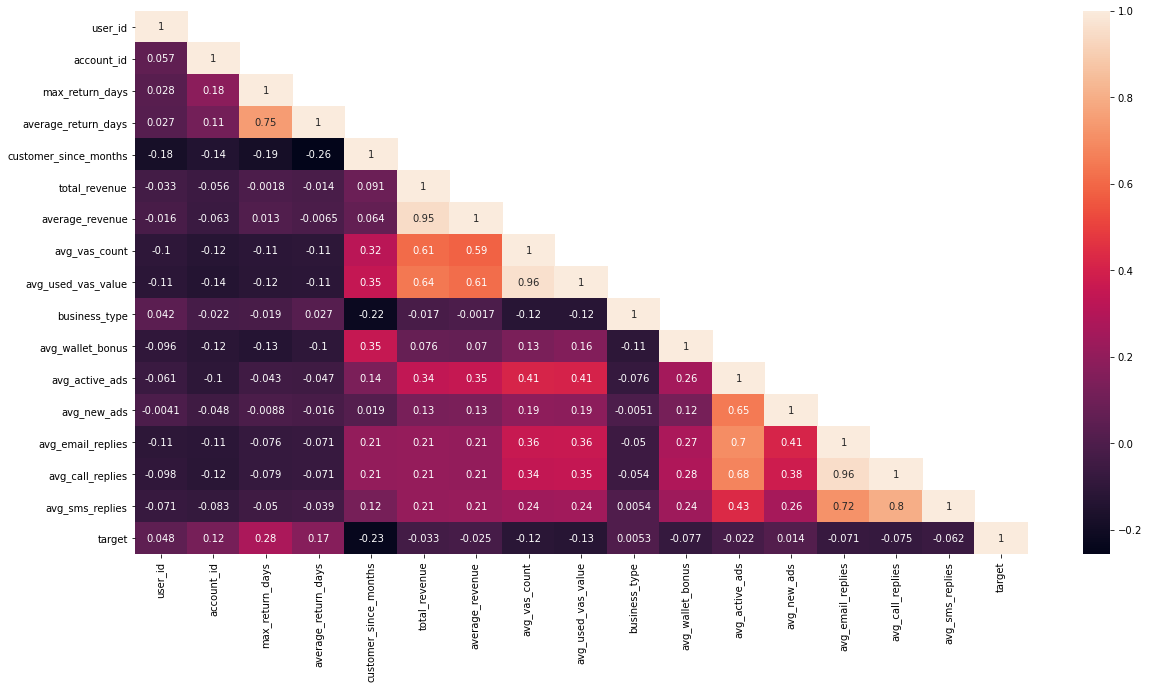

In [17]:
# plot correlation matrix
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), mask=mask, annot=True)

# we need to remove highly correlated columns, which will do in feature selection

In [18]:
# Filter the continouse columns

continouse_cols = [cols for cols in df.columns if len(df[cols].unique()) > 25]

print('The number of numeric columns are:', (continouse_cols))

The number of numeric columns are: ['user_id', 'max_return_days', 'average_return_days', 'total_revenue', 'average_revenue', 'avg_vas_count', 'avg_used_vas_value', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads', 'avg_email_replies', 'avg_call_replies', 'avg_sms_replies']


<Figure size 576x360 with 0 Axes>

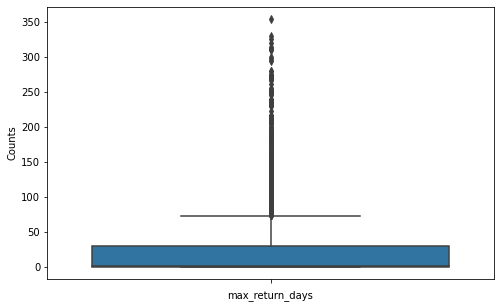

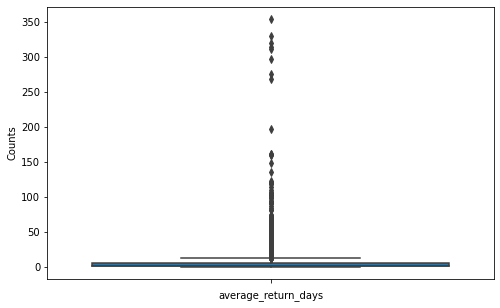

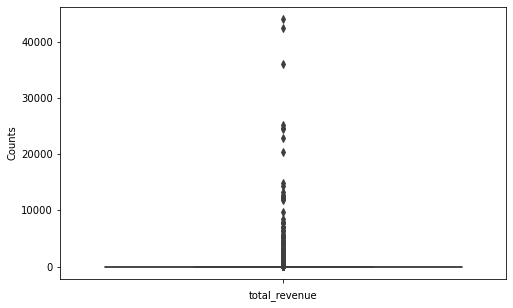

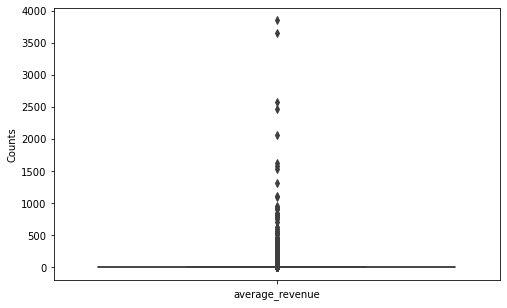

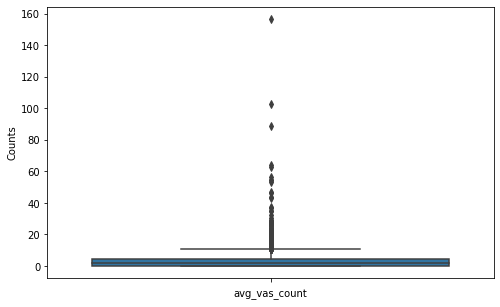

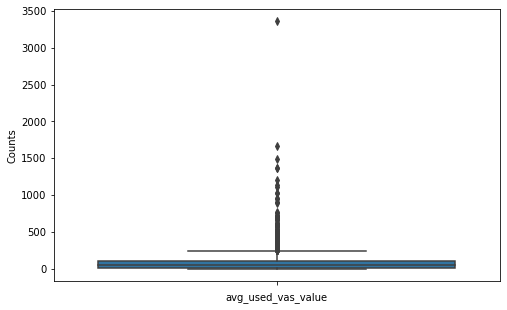

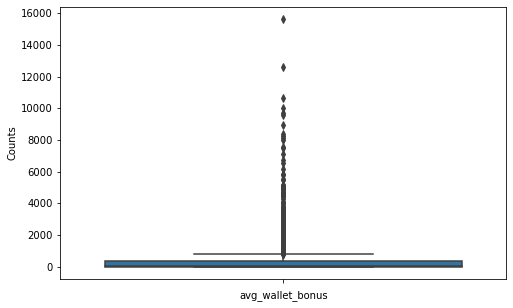

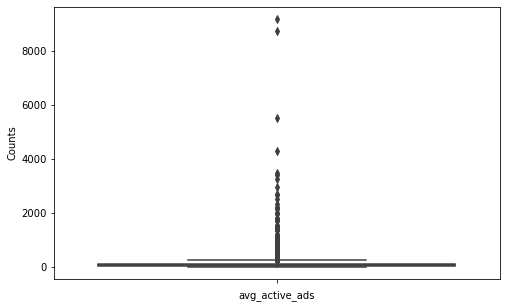

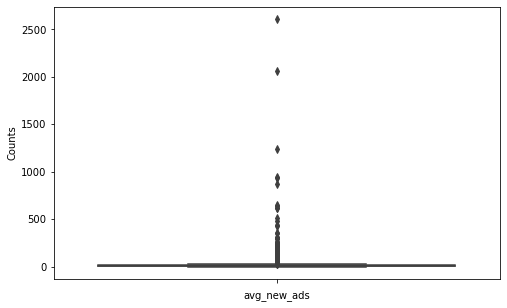

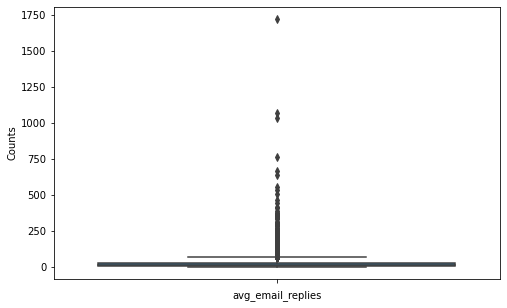

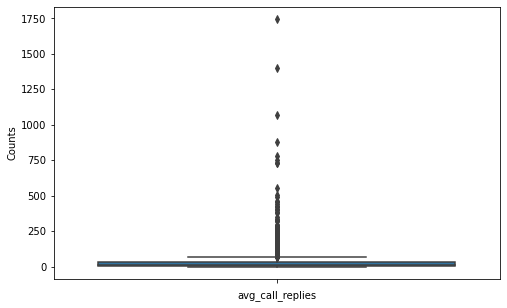

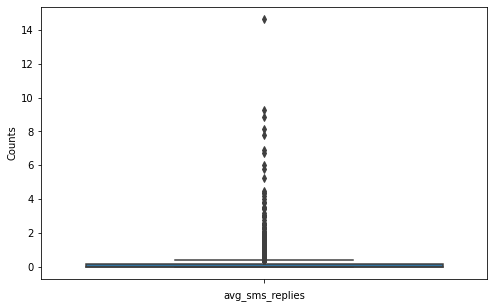

In [19]:
# Lets analyse the continuous values by creating boxplot to check if there is any outliers

for cols in continouse_cols:
    plt.figure(figsize=(8,5))
    if cols not in ['user_id', 'account_id', 'target']:
        sns.boxplot(df[cols], orient="v")
        plt.xlabel(cols)
        plt.ylabel('Counts')
        plt.show()

## Feature generation

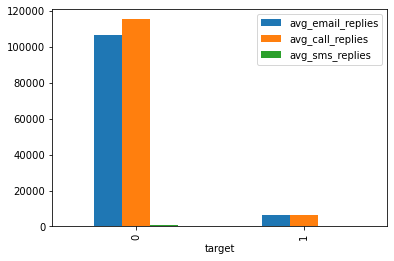

In [20]:
# customer who have got more email and call are the one left

df.groupby('target')[['avg_email_replies', 'avg_call_replies', 'avg_sms_replies']].sum().plot.bar()

In [21]:
# generate a new feature by adding up all the medium of contact

df['total_reply'] = df['avg_email_replies'] + df['avg_call_replies'] + df['avg_sms_replies']
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,total_reply
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0,60.583333
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0,30.000000
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0,44.750000
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1,145.076923
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0,43.461538


## Dropping usless Columns

In [22]:
# drop redudent columns

new_df = df.drop(['avg_email_replies','avg_call_replies','avg_sms_replies', 'user_id', 'account_id'], axis=1)

## Feature Scaling

In [23]:
# total number of fetures

featuresd_cols = new_df.columns.tolist()
featuresd_cols = [cols for cols in featuresd_cols if 'target' not in cols]

print(featuresd_cols )
print('\n Total number of features:', len(featuresd_cols))

['max_return_days', 'average_return_days', 'customer_since_months', 'total_revenue', 'average_revenue', 'avg_vas_count', 'avg_used_vas_value', 'business_type', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads', 'total_reply']

 Total number of features: 12


In [24]:
# import library for scaling

from sklearn.preprocessing import MinMaxScaler


In [25]:
scaler = MinMaxScaler()

scaler.fit(new_df[featuresd_cols])

new_df[featuresd_cols] = scaler.transform(new_df[featuresd_cols])

In [26]:
new_df.head(3)

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,target,total_reply
0,0.019830,0.002829,0.565217,0.0,0.0,0.023417,0.019856,0.0,0.019223,0.008638,0.005852,0,0.017492
1,0.101983,0.021782,0.391304,0.0,0.0,0.031293,0.033954,0.0,0.000000,0.025273,0.007022,0,0.008662
2,0.022663,0.002923,0.608696,0.0,0.0,0.034061,0.031770,0.0,0.009611,0.005998,0.001439,0,0.012921


## Feature selection

In [27]:
X = new_df.drop('target', axis=1)
y = new_df['target']

X.shape, y.shape

((4407, 12), (4407,))

In [28]:
def data_split(x, y, t_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_size, random_state = 0)
    print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape)
    
    return x_train, x_test, y_train, y_test

In [29]:
X_train, X_test, y_train, y_test = data_split(X, y, 0.2)

(3525, 12) (3525,) (882, 12) (882,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
f = clf.feature_importances_

final_dfs = pd.DataFrame({"Features": X_train.columns, "Importances":f})

final_dfs = final_dfs.sort_values('Importances', ascending=False)

final_dfs

,Features,Importances
11,total_reply,0.160119
0,max_return_days,0.149800
2,customer_since_months,0.149052
9,avg_active_ads,0.142833
10,avg_new_ads,0.112385
1,average_return_days,0.077200
8,avg_wallet_bonus,0.066169
6,avg_used_vas_value,0.046610
5,avg_vas_count,0.044598
7,business_type,0.043455


## Splitting predictor and target

In [31]:
# we will use the top 7 feature to train out model

X_new = X[final_dfs.Features[0:7]]

y_new = new_df['target']

X_new.head(2)

,total_reply,max_return_days,customer_since_months,avg_active_ads,avg_new_ads,average_return_days,avg_wallet_bonus
0,0.017492,0.019830,0.565217,0.008638,0.005852,0.002829,0.019223
1,0.008662,0.101983,0.391304,0.025273,0.007022,0.021782,0.000000


## Handle imbalance class (Oversampling)

In [32]:
# we will use SMOTE oversampleling techniqe to handel imbalance class

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
X_train_new, y_train_new = smote.fit_resample(X_new, y_new)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_train_new))

Original dataset shape Counter({0: 3952, 1: 455})
Resample dataset shape Counter({0: 3952, 1: 3952})


In [33]:
X_train_new.shape

(7904, 7)

In [34]:
y_train_new.shape

(7904,)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, classification_report, auc

In [36]:
def stacking_model(x_train, y_train):
    # define the base models
    base_model = list()
    base_model.append(('dtc',DecisionTreeClassifier()))
    base_model.append(('knnc', KNeighborsClassifier()))
    base_model.append(('svc', SVC()))
    base_model.append(('gnb', GaussianNB()))
    base_model.append(('rfc', RandomForestClassifier(n_estimators=140)))

    # define meta learner model
    mata_model = LogisticRegression()

    # define the stacking ensemble
    model = StackingClassifier(estimators=base_model, final_estimator=mata_model, cv=5)

    # fit the model on all available data
    return model.fit(x_train, y_train)

In [37]:
def evaluation(x_true, y_predict):
    acc = accuracy_score(x_true, y_predict)
    class_report = classification_report(x_true, y_predict)
    f1_ = f1_score(x_true, y_predict)
    return acc, class_report, f1_

In [38]:
def roc_auc_plot(model,x_test):
    # Now let's plot the ROC curve and calculate AUC on the test set

    adsu = model.predict_proba(x_test)[:,1]
    plt.subplots(figsize=(8,6))
    fpr, tpr, thresholds = roc_curve(y_test, adsu)
    plt.plot(fpr, tpr, label='ROC Curve')
    x = np.linspace(0,1,num=50)
    plt.plot(x,x,linestyle='--',marker='',lw=2,label='random guess')
    plt.legend(fontsize = 14)
    plt.xlabel('False positive rate', fontsize = 18)
    plt.ylabel('True positive rate', fontsize = 18)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

    AUC_RF = auc(fpr,tpr)
    print('RF AUC is: ', round(AUC_RF * 100,2), '%')

## Using sklearn StackingRegressor (With Oversampling)

In [39]:
# train test split
x_train, x_test, y_train, y_test = data_split(X_train_new, y_train_new,.2)

(6323, 7) (6323,) (1581, 7) (1581,)


In [40]:
model = stacking_model(x_train, y_train)

In [41]:
y_predict = model.predict(x_test)

In [42]:
acc, class_report, f1_ = evaluation(y_test, y_predict)

print('The accuracy score on TEST is : ', acc)
print('\nThe F1 score on TEST is : ', f1_)
print('\nClassification report on TEST is : \n', class_report)

The accuracy score on TEST is :  0.90955091714105

The F1 score on TEST is :  0.911014312383323

Classification report on TEST is : 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       788
           1       0.90      0.92      0.91       793

    accuracy                           0.91      1581
   macro avg       0.91      0.91      0.91      1581
weighted avg       0.91      0.91      0.91      1581



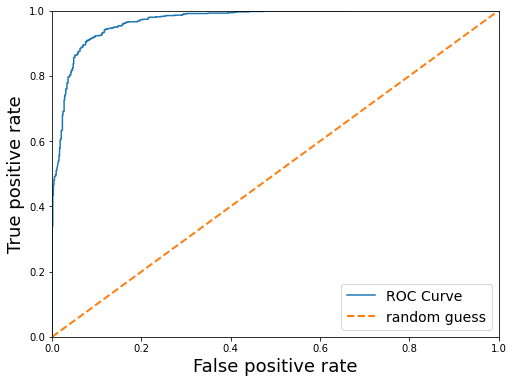

RF AUC is:  97.01 %


In [43]:
# plot roc auc curve

roc_auc_plot(model,x_test)

In [44]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_train.columns, 
                    class_names=['target'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

Intercept -0.03398059928321243
Prediction_local [0.15103515]
Right: 1


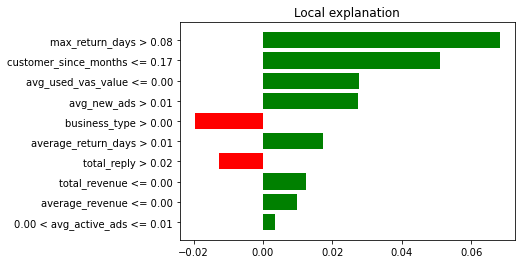

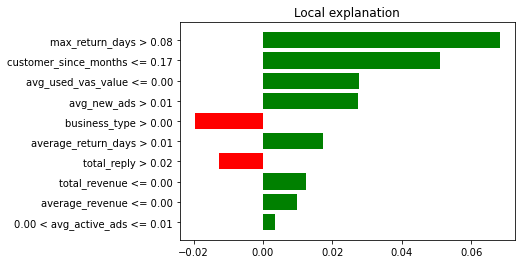

In [59]:
exp = explainer.explain_instance(x_test.iloc[0], model.predict)
exp.as_pyplot_figure()

In [60]:
exp.show_in_notebook(show_table=True, show_all=False)

## Using sklearn StackingRegressor (Without Oversampling)

In [45]:
# train test split
x_train, x_test, y_train, y_test = data_split(X, y, 0.2)

(3525, 12) (3525,) (882, 12) (882,)


In [46]:
model = stacking_model(x_train, y_train)

In [47]:
y_predict = model.predict(x_test)

In [48]:
acc, class_report, f1_ = evaluation(y_test, y_predict)

print('The accuracy score on TEST is : ', acc)
print('\nThe F1 score on TEST is : ', f1_)
print('\nClassification report on TEST is : \n', class_report)

The accuracy score on TEST is :  0.9172335600907029

The F1 score on TEST is :  0.4748201438848921

Classification report on TEST is : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       792
           1       0.67      0.37      0.47        90

    accuracy                           0.92       882
   macro avg       0.80      0.67      0.71       882
weighted avg       0.91      0.92      0.91       882



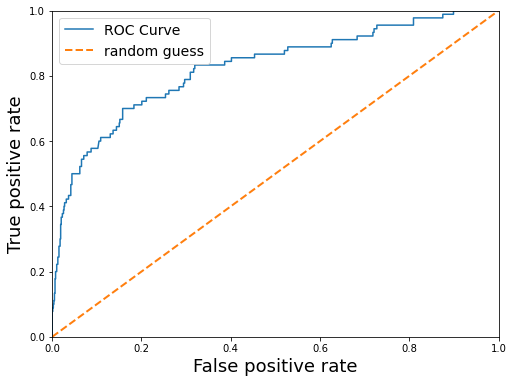

RF AUC is:  82.51 %


In [49]:
# plot roc auc curve

roc_auc_plot(model,x_test)

In [57]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=x_train.columns, 
                    class_names=['target'],                                
                    verbose=True, mode='regression')

Intercept -0.032439743987514716
Prediction_local [0.1141162]
Right: 1


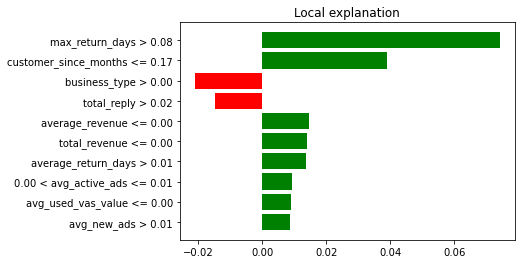

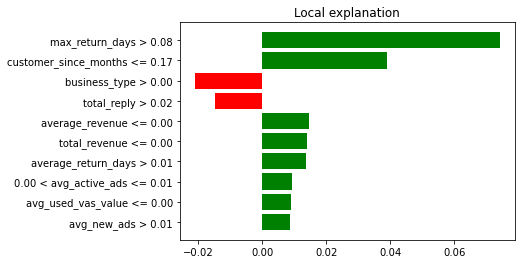

In [58]:
exp = explainer.explain_instance(x_test.iloc[0], model.predict)
exp.as_pyplot_figure()

In [61]:
exp.show_in_notebook(show_table=True, show_all=False)